<a href="https://colab.research.google.com/github/Klrojasm/DPS/blob/main/tarea_2_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

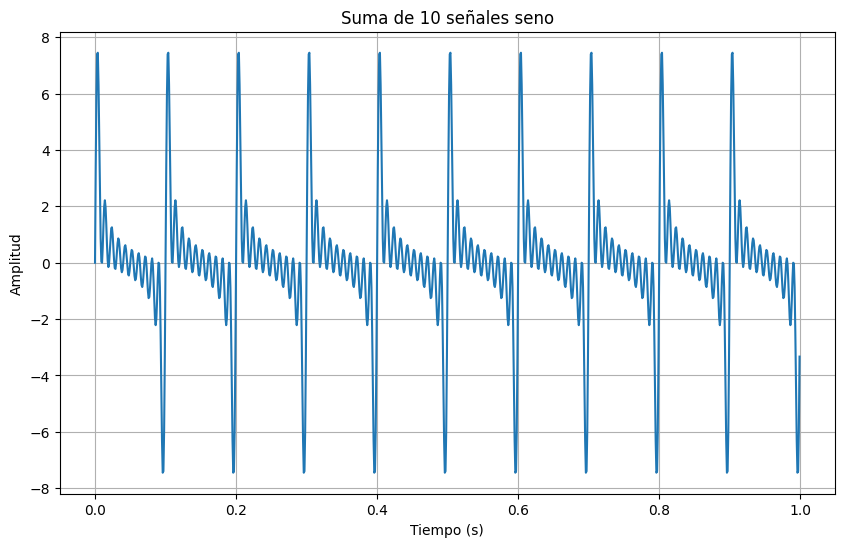

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo
duration = 1  # Duración de la señal
t = np.arange(0, duration, 1/fs)  # Vector de tiempo
num_signals = 11

# Inicializar la suma de señales
sum_signal = np.zeros_like(t)

# Crear y sumar las señales seno
for i in range(num_signals):
    frequency = i * 10  # Frecuencia de la señal i-ésima
    amplitude = 1  # Amplitud de la señal i-ésima
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    sum_signal += signal


# Graficar la señal suma
plt.figure(figsize=(10, 6))
plt.plot(t, sum_signal)
plt.title('Suma de 10 señales seno')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

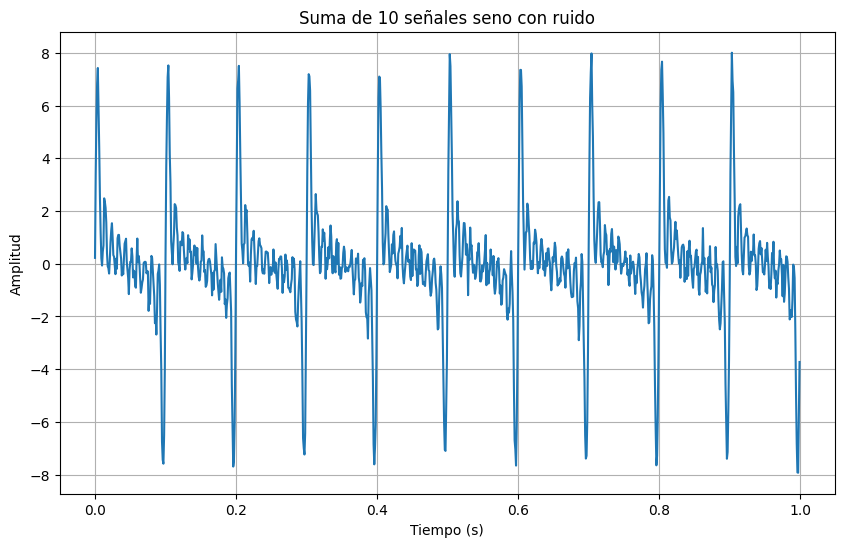

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Agregar ruido blanco gaussiano
noise = 0.3 * np.random.normal(0, 1, len(sum_signal))
sum_signal += noise

# Graficar la señal suma con ruido
plt.figure(figsize=(10, 6))
plt.plot(t, sum_signal)
plt.title('Suma de 10 señales seno con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

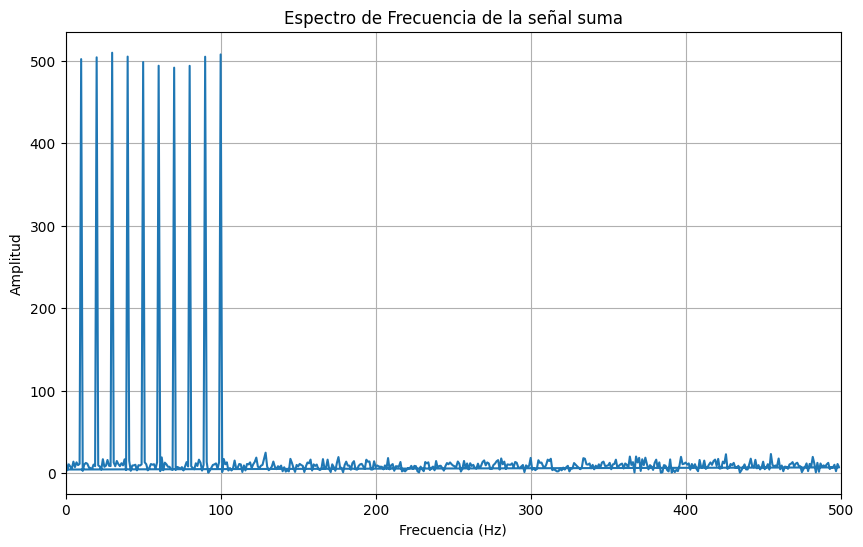

In [3]:
# Calcular la FFT de la señal suma
w = np.fft.fft(sum_signal)

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(sum_signal), 1/fs)

# Graficar el espectro de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(w))
plt.title('Espectro de Frecuencia de la señal suma')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, fs/2) # Mostrar solo la parte positiva del espectro
plt.grid(True)
plt.show()

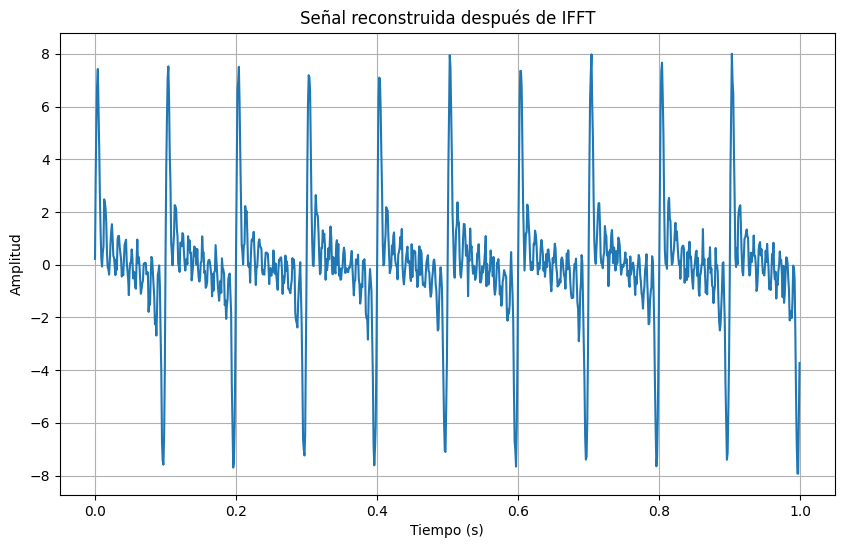

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular la IFFT de W
ifft_signal = np.fft.ifft(w)

# Graficar la señal reconstruida
plt.figure(figsize=(10, 6))
plt.plot(t, ifft_signal.real) # .real para obtener la parte real
plt.title('Señal reconstruida después de IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

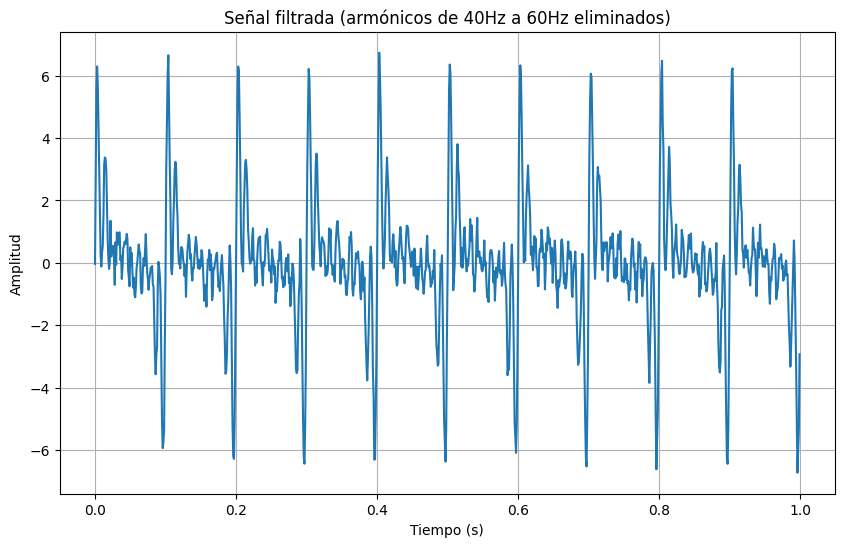

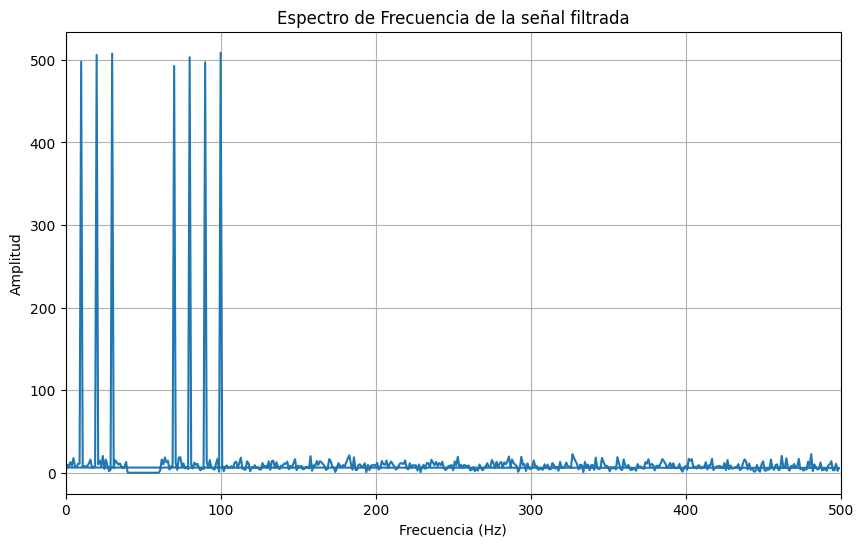

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo
duration = 1  # Duración de la señal
t = np.arange(0, duration, 1/fs)  # Vector de tiempo
num_signals = 11

# Inicializar la suma de señales
sum_signal = np.zeros_like(t)

# Crear y sumar las señales seno
for i in range(num_signals):
    frequency = i * 10  # Frecuencia de la señal i-ésima
    amplitude = 1  # Amplitud de la señal i-ésima
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    sum_signal += signal

# Agregar ruido blanco gaussiano
noise = 0.3 * np.random.normal(0, 1, len(sum_signal))
sum_signal += noise

# Calcular la FFT de la señal suma
w = np.fft.fft(sum_signal)

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(sum_signal), 1/fs)

# Encontrar los índices de las frecuencias a eliminar
indices_to_remove = np.where((frequencies >= 40) & (frequencies <= 60))

# Eliminar los armónicos en el espectro de frecuencias
w[indices_to_remove] = 0

# Calcular la IFFT de la señal modificada
filtered_signal = np.fft.ifft(w)

# Graficar la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(t, filtered_signal.real)
plt.title('Señal filtrada (armónicos de 40Hz a 60Hz eliminados)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar el espectro de frecuencia de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(w))
plt.title('Espectro de Frecuencia de la señal filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, fs/2)
plt.grid(True)
plt.show()

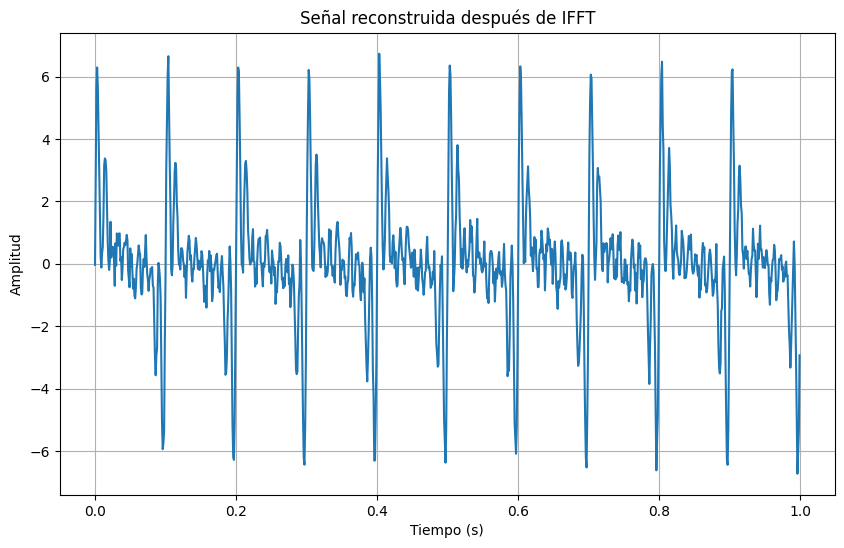

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular la IFFT de W
ifft_signal = np.fft.ifft(w)

# Graficar la señal reconstruida
plt.figure(figsize=(10, 6))
plt.plot(t, ifft_signal.real) # .real para obtener la parte real
plt.title('Señal reconstruida después de IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

##**Ecualizador de una sola banda PARTE DOS DEL TRABAJO**

##Usar fltros, señales, potencias y reportar las señales ganancias en decibeles

poner snr variable y plotear su densidad espectral utilizando pasabandas
convertir ecualizador de una sola banda a uno de más

In [7]:
!pip install dsp_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.0 MB/s eta 0:00:00


In [13]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq
from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer
from ipywidgets import interact, FloatSlider

In [14]:
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    signal_filtered = f(signal)
    return signal_filtered

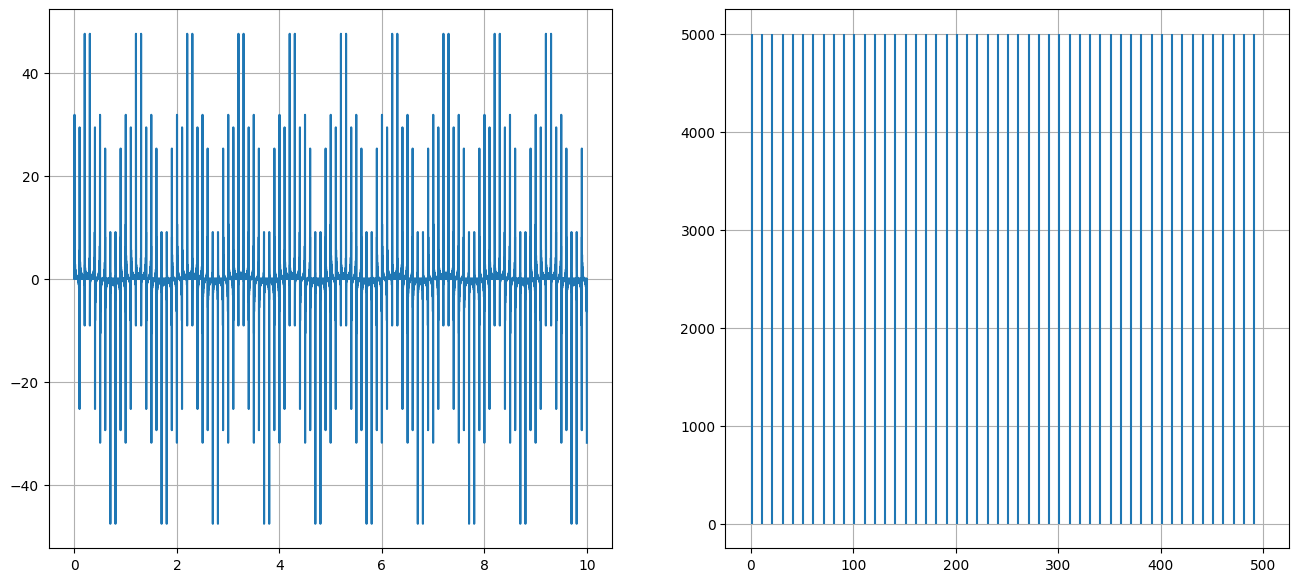

In [15]:
vis = Visualizer(figsize=(16, 7), dpi=100)

f = np.arange(1, 500, 10)

generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)

vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

In [16]:
@interact(fc=(0, 500, 10), wb=(10, 250, 10), gain=(-40, 40, 1))
def equalizer(fc=100, wb=10, gain=0):
    f0 = fc-wb
    f1 = fc+wb
    sample_rate = generador.sampling_rate

    if f0<=0:
        f0 = 0.1
    if f1>=sample_rate/2:
        f1 = sample_rate/2 - 0.1

    signal_filtered = filter_(signal, f0, f1, sample_rate)

    signal_equalized = (signal - signal_filtered) + (signal_filtered*np.power(10, (gain / 20)))

    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()

interactive(children=(IntSlider(value=100, description='fc', max=500, step=10), IntSlider(value=10, descriptio…

In [17]:
# Función para aplicar el filtro pasa banda
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    return f(signal)

# Configuración del visualizador y generación de señal base
vis = Visualizer(figsize=(16, 7), dpi=100)
f = np.arange(1, 500, 10)
generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)
vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

# Función interactiva para el ecualizador de 5 bandas
@interact(
    gain1=FloatSlider(min=-20, max=20, step=1, value=0, description='Gain 1 (dB)'),
    gain2=FloatSlider(min=-20, max=20, step=1, value=0, description='Gain 2 (dB)'),
    gain3=FloatSlider(min=-20, max=20, step=1, value=0, description='Gain 3 (dB)'),
    gain4=FloatSlider(min=-20, max=20, step=1, value=0, description='Gain 4 (dB)'),
    gain5=FloatSlider(min=-20, max=20, step=1, value=0, description='Gain 5 (dB)')
)
def five_band_equalizer(gain1, gain2, gain3, gain4, gain5):
    sample_rate = generador.sampling_rate
    signal_equalized = np.zeros_like(signal)

    # Definición de frecuencias centrales y anchos de banda para las 5 bandas
    fc_list = [100, 200, 300, 400, 500]  # Frecuencias centrales
    wb_list = [20, 20, 20, 20, 20]       # Ancho de banda (Hz)
    gain_list = [gain1, gain2, gain3, gain4, gain5]

    # Aplicar filtros y ganancias
    for fc, wb, gain in zip(fc_list, wb_list, gain_list):
        f0 = max(fc - wb, 0.1)  # Evitar valores negativos
        f1 = min(fc + wb, sample_rate / 2 - 0.1)  # Evitar exceder Nyquist
        signal_filtered = filter_(signal, f0, f1, sample_rate)
        gain_factor = np.power(10, gain / 20)  # Convertir dB a factor de amplitud
        signal_equalized += signal_filtered * gain_factor

    # Agregar la señal residual fuera de las bandas
    residual_signal = signal - np.sum(
        [filter_(signal, max(fc - wb, 0.1), min(fc + wb, sample_rate / 2 - 0.1), sample_rate)
         for fc, wb in zip(fc_list, wb_list)],
        axis=0
    )
    signal_equalized += residual_signal

    # Visualizar la señal ecualizada
    vis.plot_dsp(signal_equalized, sample_rate=sample_rate, time=generador.time, ffn='vlines')
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='Gain 1 (dB)', max=20.0, min=-20.0, step=1.0), FloatS…